# Chapter 5. Sequence Input/Output
In this chapter we’ll discuss in more detail the `Bio.SeqIO` module, which was briefly introduced in Chapter 2
and also used in Chapter 4. This aims to provide a simple interface for working with assorted sequence file
formats in a uniform way. See also the [`Bio.SeqIO` wiki page](http://biopython.org/wiki/SeqIO), and
the built in documentation (also online):

The workhorse function `Bio.SeqIO.parse()` is used to read in sequence data as SeqRecord objects. This
function expects two arguments:
1. The first argument is a handle to read the data from, or a filename. A handle is typically a file opened
for reading, but could be the output from a command line program, or data downloaded from the
internet (see Section 5.3). See Section 23.1 for more about handles.
2. The second argument is a lower case string specifying sequence format – we don’t try and guess the
file format for you! See http://biopython.org/wiki/SeqIO for a full listing of supported formats.
The `Bio.SeqIO.parse()` function returns an iterator which gives SeqRecord objects. Iterators are
typically used in a for loop as shown below.
Sometimes you’ll find yourself dealing with files which contain only a single record. For this situation
use the function `Bio.SeqIO.read()` which takes the same arguments. Provided there is one and only one
record in the file, this is returned as a SeqRecord object. Otherwise an exception is raised.

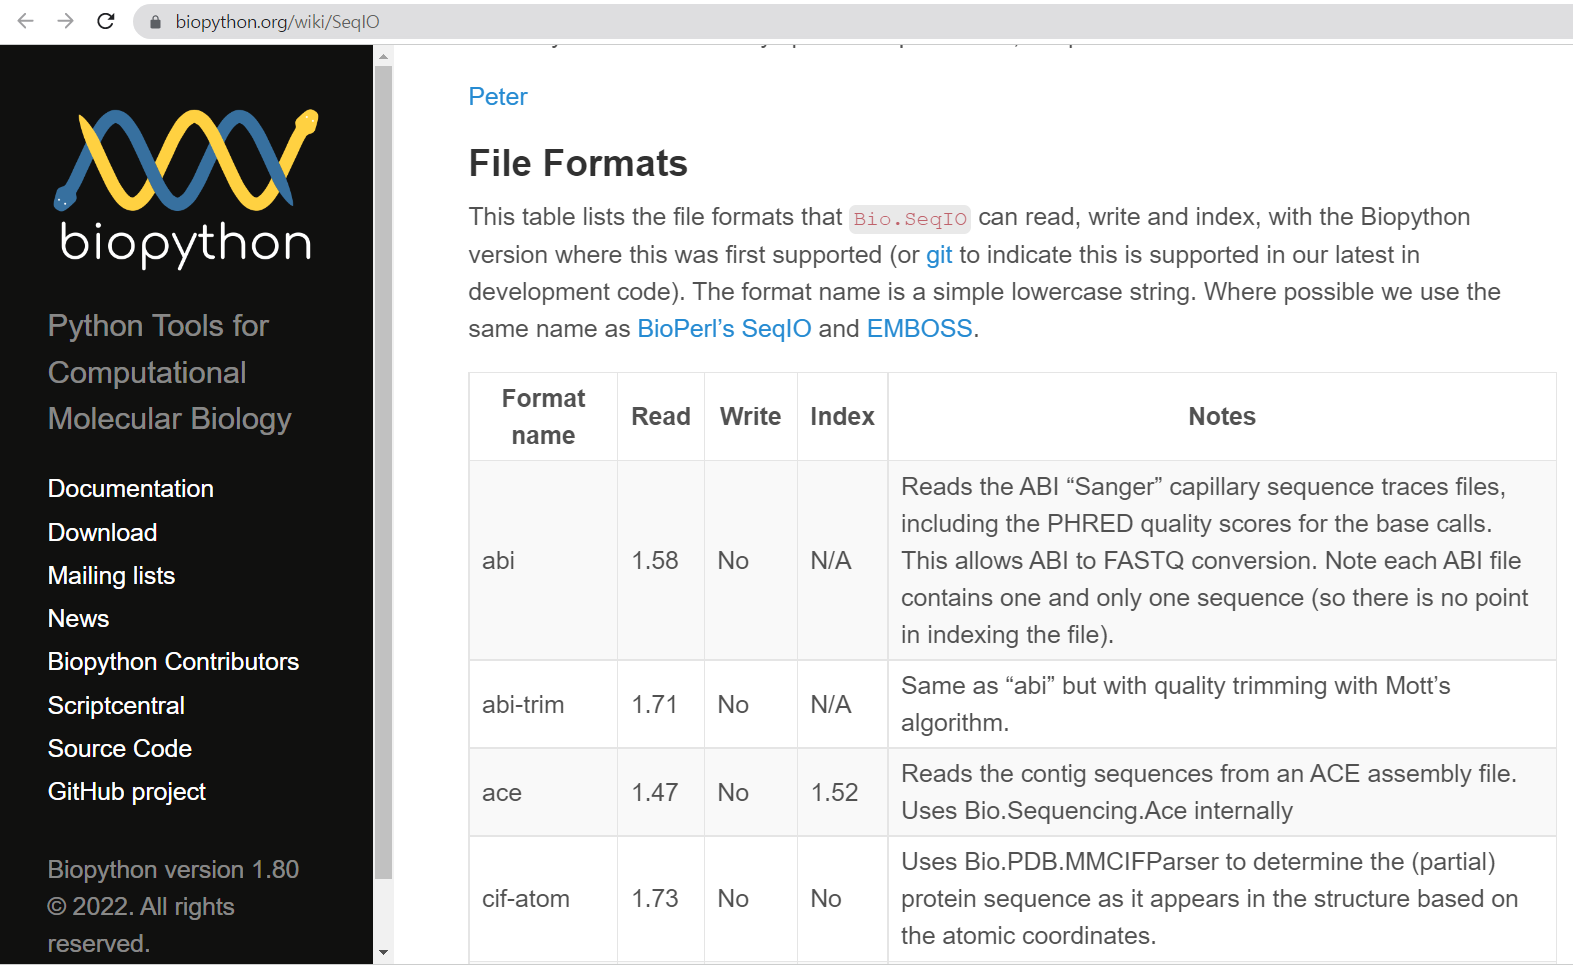

In [1]:
from Bio import SeqIO
help(SeqIO)

Help on package Bio.SeqIO in Bio:

NAME
    Bio.SeqIO - Sequence input/output as SeqRecord objects.

DESCRIPTION
    Bio.SeqIO is also documented at SeqIO_ and by a whole chapter in our tutorial:
    
      - `HTML Tutorial`_
      - `PDF Tutorial`_
    
    .. _SeqIO: http://biopython.org/wiki/SeqIO
    .. _`HTML Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.html
    .. _`PDF Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf
    
    Input
    -----
    The main function is Bio.SeqIO.parse(...) which takes an input file handle
    (or in recent versions of Biopython alternatively a filename as a string),
    and format string.  This returns an iterator giving SeqRecord objects:
    
    >>> from Bio import SeqIO
    >>> for record in SeqIO.parse("Fasta/f002", "fasta"):
    ...     print("%s %i" % (record.id, len(record)))
    gi|1348912|gb|G26680|G26680 633
    gi|1348917|gb|G26685|G26685 413
    gi|1592936|gb|G29385|G29385 471
    
    Note that the parse(

## 5.1 Parsing or Reading Sequences

### 5.1.1 Reading Sequence Files
* To download test file : [`ls_orchid.fasta`](https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta), [`ls_orchid.gbk`](https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.gbk)

In [2]:
from Bio import SeqIO
for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740
gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704
gi|2765649|emb|Z78524.1|CFZ78524
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740
gi|2765648|emb|Z78523.1|CHZ78523
Seq('CGTAACCAGGTTTCCGT

In [3]:
for seq_record in SeqIO.parse("ls_orchid.gbk", "genbank"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

Z78533.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740
Z78532.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753
Z78531.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748
Z78530.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744
Z78529.1
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733
Z78527.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718
Z78526.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730
Z78525.1
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704
Z78524.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740
Z78523.1
Seq('CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAG...AAG')
709
Z78522.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...GAG')
700
Z78521.1
Seq('GTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAGAATATATGATCGAGT...ACC')
726
Z78520.1
Seq('CGTAACAAGGTTTC

In [4]:
from Bio import SeqIO
identifiers = [seq_record.id for seq_record in SeqIO.parse("ls_orchid.gbk", "genbank")]
identifiers

['Z78533.1',
 'Z78532.1',
 'Z78531.1',
 'Z78530.1',
 'Z78529.1',
 'Z78527.1',
 'Z78526.1',
 'Z78525.1',
 'Z78524.1',
 'Z78523.1',
 'Z78522.1',
 'Z78521.1',
 'Z78520.1',
 'Z78519.1',
 'Z78518.1',
 'Z78517.1',
 'Z78516.1',
 'Z78515.1',
 'Z78514.1',
 'Z78513.1',
 'Z78512.1',
 'Z78511.1',
 'Z78510.1',
 'Z78509.1',
 'Z78508.1',
 'Z78507.1',
 'Z78506.1',
 'Z78505.1',
 'Z78504.1',
 'Z78503.1',
 'Z78502.1',
 'Z78501.1',
 'Z78500.1',
 'Z78499.1',
 'Z78498.1',
 'Z78497.1',
 'Z78496.1',
 'Z78495.1',
 'Z78494.1',
 'Z78493.1',
 'Z78492.1',
 'Z78491.1',
 'Z78490.1',
 'Z78489.1',
 'Z78488.1',
 'Z78487.1',
 'Z78486.1',
 'Z78485.1',
 'Z78484.1',
 'Z78483.1',
 'Z78482.1',
 'Z78481.1',
 'Z78480.1',
 'Z78479.1',
 'Z78478.1',
 'Z78477.1',
 'Z78476.1',
 'Z78475.1',
 'Z78474.1',
 'Z78473.1',
 'Z78472.1',
 'Z78471.1',
 'Z78470.1',
 'Z78469.1',
 'Z78468.1',
 'Z78467.1',
 'Z78466.1',
 'Z78465.1',
 'Z78464.1',
 'Z78463.1',
 'Z78462.1',
 'Z78461.1',
 'Z78460.1',
 'Z78459.1',
 'Z78458.1',
 'Z78457.1',
 'Z78456.1',

### 5.1.2 Iterating over the records in a sequence file
Instead of using a for loop, can also use the next() function on an iterator to step through the entries, like this:

In [5]:
from Bio import SeqIO

record_iterator = SeqIO.parse("ls_orchid.fasta", "fasta")

first_record = next(record_iterator)
print(first_record.id)
print(first_record.description)

second_record = next(record_iterator)
print(second_record.id)
print(second_record.description)

gi|2765658|emb|Z78533.1|CIZ78533
gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
gi|2765657|emb|Z78532.1|CCZ78532
gi|2765657|emb|Z78532.1|CCZ78532 C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA


In [6]:
from Bio import SeqIO
first_record = next(SeqIO.parse("ls_orchid.gbk", "genbank"))

### 5.1.3 Getting a list of the records in a sequence file

In [7]:
from Bio import SeqIO

records = list(SeqIO.parse("ls_orchid.gbk", "genbank"))

print("Found %i records" % len(records))

Found 94 records


In [8]:
print("The last record")
last_record = records[-1] # using Python's list tricks
print(last_record.id)
print(repr(last_record.seq))
print(len(last_record))

The last record
Z78439.1
Seq('CATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGTTTACT...GCC')
592


In [9]:
print("The first record")
first_record = records[0] # remember, Python counts from zero
print(first_record.id)
print(repr(first_record.seq))
print(len(first_record))

The first record
Z78533.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740


### 5.1.4 Extracting data

In [10]:
from Bio import SeqIO
record_iterator = SeqIO.parse("ls_orchid.gbk", "genbank")
first_record = next(record_iterator)
print(first_record)

ID: Z78533.1
Name: Z78533
Description: C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 5
/molecule_type=DNA
/topology=linear
/data_file_division=PLN
/date=30-NOV-2006
/accessions=['Z78533']
/sequence_version=1
/gi=2765658
/keywords=['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2']
/source=Cypripedium irapeanum
/organism=Cypripedium irapeanum
/taxonomy=['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Cypripedium']
/references=[Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')


In [11]:
print(first_record.annotations)
print(first_record.annotations.keys())
print(first_record.annotations.values())

{'molecule_type': 'DNA', 'topology': 'linear', 'data_file_division': 'PLN', 'date': '30-NOV-2006', 'accessions': ['Z78533'], 'sequence_version': 1, 'gi': '2765658', 'keywords': ['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2'], 'source': 'Cypripedium irapeanum', 'organism': 'Cypripedium irapeanum', 'taxonomy': ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Cypripedium'], 'references': [Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]}
dict_keys(['molecule_type', 'topology', 'data_file_division', 'date', 'accessions', 'sequence_version', 'gi', 'keywords', 'source', 'organism', 'taxonomy', 'references'])
dict_values(['DNA', 'linear', 'PLN', '30-NOV-2006', ['Z78533'], 1, '2765658', ['5.8S ribosomal RNA', '5.8S r

In [12]:
print(first_record.annotations["source"])
print(first_record.annotations["organism"])

Cypripedium irapeanum
Cypripedium irapeanum


In [13]:
from Bio import SeqIO
all_species = []
for seq_record in SeqIO.parse("ls_orchid.gbk", "genbank"):
    all_species.append(seq_record.annotations["organism"])
print(all_species)

['Cypripedium irapeanum', 'Cypripedium californicum', 'Cypripedium fasciculatum', 'Cypripedium margaritaceum', 'Cypripedium lichiangense', 'Cypripedium yatabeanum', 'Cypripedium guttatum', 'Cypripedium acaule', 'Cypripedium formosanum', 'Cypripedium himalaicum', 'Cypripedium macranthon', 'Cypripedium calceolus', 'Cypripedium segawai', 'Cypripedium parviflorum var. pubescens', 'Cypripedium reginae', 'Cypripedium flavum', 'Cypripedium passerinum', 'Mexipedium xerophyticum', 'Phragmipedium schlimii', 'Phragmipedium besseae', 'Phragmipedium wallisii', 'Phragmipedium exstaminodium', 'Phragmipedium caricinum', 'Phragmipedium pearcei', 'Phragmipedium longifolium', 'Phragmipedium lindenii', 'Phragmipedium lindleyanum', 'Phragmipedium sargentianum', 'Phragmipedium kaiteurum', 'Phragmipedium czerwiakowianum', 'Phragmipedium boissierianum', 'Phragmipedium caudatum', 'Phragmipedium warszewiczianum', 'Paphiopedilum micranthum', 'Paphiopedilum malipoense', 'Paphiopedilum delenatii', 'Paphiopedilum a

In [14]:
from Bio import SeqIO
all_species = [
    seq_record.annotations["organism"]
    for seq_record in SeqIO.parse("ls_orchid.gbk", "genbank")
]
print(all_species)

['Cypripedium irapeanum', 'Cypripedium californicum', 'Cypripedium fasciculatum', 'Cypripedium margaritaceum', 'Cypripedium lichiangense', 'Cypripedium yatabeanum', 'Cypripedium guttatum', 'Cypripedium acaule', 'Cypripedium formosanum', 'Cypripedium himalaicum', 'Cypripedium macranthon', 'Cypripedium calceolus', 'Cypripedium segawai', 'Cypripedium parviflorum var. pubescens', 'Cypripedium reginae', 'Cypripedium flavum', 'Cypripedium passerinum', 'Mexipedium xerophyticum', 'Phragmipedium schlimii', 'Phragmipedium besseae', 'Phragmipedium wallisii', 'Phragmipedium exstaminodium', 'Phragmipedium caricinum', 'Phragmipedium pearcei', 'Phragmipedium longifolium', 'Phragmipedium lindenii', 'Phragmipedium lindleyanum', 'Phragmipedium sargentianum', 'Phragmipedium kaiteurum', 'Phragmipedium czerwiakowianum', 'Phragmipedium boissierianum', 'Phragmipedium caudatum', 'Phragmipedium warszewiczianum', 'Paphiopedilum micranthum', 'Paphiopedilum malipoense', 'Paphiopedilum delenatii', 'Paphiopedilum a

Now, let’s suppose you wanted to extract a list of the species from a FASTA file, rather than the GenBank file. The bad news is you will have to write some code to extract the data you want from the record’s description line - if the information is in the file in the first place! Our example FASTA format file
[ls_orchid.fasta](https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta) starts like this:
```
gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTG
AATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGG
...
```
You can check by hand, but for every record the species name is in the description line as the second word. This means if we break up each record’s .description at the spaces, then the species is there as field number one (field zero is the record identifier). That means we can do this:

In [15]:
from Bio import SeqIO
all_species = []
for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta"):
    all_species.append(seq_record.description.split()[1])
print(all_species) # doctest:+ELLIPSIS

['C.irapeanum', 'C.californicum', 'C.fasciculatum', 'C.margaritaceum', 'C.lichiangense', 'C.yatabeanum', 'C.guttatum', 'C.acaule', 'C.formosanum', 'C.himalaicum', 'C.macranthum', 'C.calceolus', 'C.segawai', 'C.pubescens', 'C.reginae', 'C.flavum', 'C.passerinum', 'M.xerophyticum', 'P.schlimii', 'P.besseae', 'P.wallisii', 'P.exstaminodium', 'P.caricinum', 'P.pearcei', 'P.longifolium', 'P.lindenii', 'P.lindleyanum', 'P.sargentianum', 'P.kaiteurum', 'P.czerwiakowianum', 'P.boissierianum', 'P.caudatum', 'P.warszewiczianum', 'P.micranthum', 'P.malipoense', 'P.delenatii', 'P.armeniacum', 'P.emersonii', 'P.niveum', 'P.godefroyae', 'P.bellatulum', 'P.concolor', 'P.fairrieanum', 'P.druryi', 'P.tigrinum', 'P.hirsutissimum', 'P.barbigerum', 'P.henryanum', 'P.charlesworthii', 'P.villosum', 'P.exul', 'P.insigne', 'P.gratrixianum', 'P.primulinum', 'P.victoria', 'P.victoria', 'P.glaucophyllum', 'P.supardii', 'P.kolopakingii', 'P.sanderianum', 'P.lowii', 'P.dianthum', 'P.parishii', 'P.haynaldianum', 'P

In [16]:
from Bio import SeqIO
all_species = [
    seq_record.description.split()[1]
    for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta")
]
print(all_species) # doctest:+ELLIPSIS

['C.irapeanum', 'C.californicum', 'C.fasciculatum', 'C.margaritaceum', 'C.lichiangense', 'C.yatabeanum', 'C.guttatum', 'C.acaule', 'C.formosanum', 'C.himalaicum', 'C.macranthum', 'C.calceolus', 'C.segawai', 'C.pubescens', 'C.reginae', 'C.flavum', 'C.passerinum', 'M.xerophyticum', 'P.schlimii', 'P.besseae', 'P.wallisii', 'P.exstaminodium', 'P.caricinum', 'P.pearcei', 'P.longifolium', 'P.lindenii', 'P.lindleyanum', 'P.sargentianum', 'P.kaiteurum', 'P.czerwiakowianum', 'P.boissierianum', 'P.caudatum', 'P.warszewiczianum', 'P.micranthum', 'P.malipoense', 'P.delenatii', 'P.armeniacum', 'P.emersonii', 'P.niveum', 'P.godefroyae', 'P.bellatulum', 'P.concolor', 'P.fairrieanum', 'P.druryi', 'P.tigrinum', 'P.hirsutissimum', 'P.barbigerum', 'P.henryanum', 'P.charlesworthii', 'P.villosum', 'P.exul', 'P.insigne', 'P.gratrixianum', 'P.primulinum', 'P.victoria', 'P.victoria', 'P.glaucophyllum', 'P.supardii', 'P.kolopakingii', 'P.sanderianum', 'P.lowii', 'P.dianthum', 'P.parishii', 'P.haynaldianum', 'P

### 5.1.5 Modifying data

In [17]:
from Bio import SeqIO
record_iterator = SeqIO.parse("ls_orchid.fasta", "fasta")
first_record = next(record_iterator)
first_record.id
first_record.id = "new_id"
first_record.id

'new_id'

In [18]:
from Bio import SeqIO
record_iterator = SeqIO.parse("ls_orchid.fasta", "fasta")
first_record = next(record_iterator)
first_record.id = "new_id"
first_record.description = first_record.id + " " + "desired new description"
print(first_record.format("fasta")[:200])

>new_id desired new description
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAA
CGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGT
GACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGT


## 5.2 Parsing sequences from compressed files
* To download test file : [`ls_orchid.gbk.gz`](https://github.com/biopython/biopython/blob/master/Doc/examples/ls_orchid.gbk.gz), [`ls_orchid.gbk.bz2`](https://github.com/biopython/biopython/blob/master/Doc/examples/ls_orchid.gbk.bz2)

In [19]:
from Bio import SeqIO
print(sum(len(r) for r in SeqIO.parse("ls_orchid.gbk", "gb")))

67518


In [20]:
from Bio import SeqIO
with open("ls_orchid.gbk") as handle:
    print(sum(len(r) for r in SeqIO.parse(handle, "gb")))

67518


In [21]:
from Bio import SeqIO
handle = open("ls_orchid.gbk")
print(sum(len(r) for r in SeqIO.parse(handle, "gb")))

67518


In [22]:
import gzip
from Bio import SeqIO
with gzip.open("ls_orchid.gbk.gz", "rt") as handle:
    print(sum(len(r) for r in SeqIO.parse(handle, "gb")))

67518


In [23]:
import bz2
from Bio import SeqIO
with bz2.open("ls_orchid.gbk.bz2", "rt") as handle:
    print(sum(len(r) for r in SeqIO.parse(handle, "gb")))

67518


## 5.3 Parsing sequences from the net

### 5.3.1 Parsing GenBank records from the net

In [24]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "A.N.Other@example.com"
with Entrez.efetch(
    db="nucleotide", rettype="fasta", retmode="text", id="6273291"
) as handle:
    seq_record = SeqIO.read(handle, "fasta")
print("%s with %i features" % (seq_record.id, len(seq_record.features)))

AF191665.1 with 0 features


In [25]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "A.N.Other@example.com"
with Entrez.efetch(
    db="nucleotide", rettype="gb", retmode="text", id="6273291"
) as handle:
    seq_record = SeqIO.read(handle, "gb") # using "gb" as an alias for "genbank"
print("%s with %i features" % (seq_record.id, len(seq_record.features)))

AF191665.1 with 3 features


In [26]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "A.N.Other@example.com"
with Entrez.efetch(
    db="nucleotide", rettype="gb", retmode="text", id="6273291,6273290,6273289"
) as handle:
    for seq_record in SeqIO.parse(handle, "gb"):
        print("%s %s..." % (seq_record.id, seq_record.description[:50]))
        print(
            "Sequence length %i, %i features, from: %s"
            % (
                len(seq_record),
                len(seq_record.features),
                seq_record.annotations["source"],
            )
        )

AF191665.1 Opuntia marenae rpl16 gene; chloroplast gene for c...
Sequence length 902, 3 features, from: chloroplast Grusonia marenae
AF191664.1 Opuntia clavata rpl16 gene; chloroplast gene for c...
Sequence length 899, 3 features, from: chloroplast Grusonia clavata
AF191663.1 Opuntia bradtiana rpl16 gene; chloroplast gene for...
Sequence length 899, 3 features, from: chloroplast Grusonia bradtiana


### 5.3.2 Parsing SwissProt sequences from the net

In [27]:
from Bio import ExPASy
from Bio import SeqIO
with ExPASy.get_sprot_raw("O23729") as handle:
    seq_record = SeqIO.read(handle, "swiss")
print(seq_record.id)
print(seq_record.name)
print(seq_record.description)
print(repr(seq_record.seq))
print("Length %i" % len(seq_record))
print(seq_record.annotations["keywords"])

O23729
CHS3_BROFI
RecName: Full=Chalcone synthase 3; EC=2.3.1.74; AltName: Full=Naringenin-chalcone synthase 3;
Seq('MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELK...GAE')
Length 394
['Acyltransferase', 'Flavonoid biosynthesis', 'Transferase']


## 5.4 Sequence files as Dictionaries
Looping over the iterator returned by `SeqIO.parse` once will exhaust the file. For self-indexed files, such as files in the twoBit format, the return value of `SeqIO.parse` can also be used as a dictionary, allowing random access to the sequence contents. As in this case parsing is done on demand, the file must remain open as long as the sequence data is being accessed:
* To download test file : [`sequence.bigendian.2bit`](https://github.com/biopython/biopython/blob/master/Tests/TwoBit/sequence.bigendian.2bit)

In [28]:
from Bio import SeqIO
handle = open("sequence.bigendian.2bit", "rb")
records = SeqIO.parse(handle, "twobit")

In [29]:
records.keys()

dict_keys(['seq11111', 'seq222', 'seq3333', 'seq4', 'seq555', 'seq6'])

In [30]:
records["seq222"]

SeqRecord(seq=Seq('TTGATCGGTGACAAATTTTTTACAAAGAACTGTAGGACTTGCTACTTCTCCCTC...ACA'), id='seq222', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [31]:
records["seq222"].seq

Seq('TTGATCGGTGACAAATTTTTTACAAAGAACTGTAGGACTTGCTACTTCTCCCTC...ACA')

In [32]:
handle.close()
records["seq222"].seq  # ValueError: cannot retrieve sequence: file is closed

ValueError: cannot retrieve sequence: file is closed

### 5.4.1 Sequence files as Dictionaries – In memory

In [33]:
from Bio import SeqIO
orchid_dict = SeqIO.to_dict(SeqIO.parse("ls_orchid.gbk", "genbank"))

In [34]:
len(orchid_dict)

94

In [35]:
list(orchid_dict.keys())
list(orchid_dict.values())

[SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC'), id='Z78533.1', name='Z78533', description='C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC'), id='Z78532.1', name='Z78532', description='C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA'), id='Z78531.1', name='Z78531', description='C.fasciculatum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT'), id='Z78530.1', name='Z78530', description='C.margaritaceum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[]),
 SeqRecord(seq=Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA'), id='Z78529.1', name='Z78529', description='C.lichiangense 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTT

In [36]:
seq_record = orchid_dict["Z78475.1"]
print(seq_record.description)
seq_record.seq

P.supardii 5.8S rRNA gene and ITS1 and ITS2 DNA


Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACAT...GGT')

#### 5.4.1.1 Specifying the dictionary keys

In [37]:
from Bio import SeqIO
orchid_dict = SeqIO.to_dict(SeqIO.parse("ls_orchid.fasta", "fasta"))
print(orchid_dict.keys())

def get_accession(record):
    """Given a SeqRecord, return the accession number as a string.
    e.g. "gi|2765613|emb|Z78488.1|PTZ78488" -> "Z78488.1"
    """
    parts = record.id.split("|")
    assert len(parts) == 5 and parts[0] == "gi" and parts[2] == "emb"
    return parts[3]

#-----
orchid_dict = SeqIO.to_dict(
    SeqIO.parse("ls_orchid.fasta", "fasta"), key_function=get_accession
)
print(orchid_dict.keys())

dict_keys(['gi|2765658|emb|Z78533.1|CIZ78533', 'gi|2765657|emb|Z78532.1|CCZ78532', 'gi|2765656|emb|Z78531.1|CFZ78531', 'gi|2765655|emb|Z78530.1|CMZ78530', 'gi|2765654|emb|Z78529.1|CLZ78529', 'gi|2765652|emb|Z78527.1|CYZ78527', 'gi|2765651|emb|Z78526.1|CGZ78526', 'gi|2765650|emb|Z78525.1|CAZ78525', 'gi|2765649|emb|Z78524.1|CFZ78524', 'gi|2765648|emb|Z78523.1|CHZ78523', 'gi|2765647|emb|Z78522.1|CMZ78522', 'gi|2765646|emb|Z78521.1|CCZ78521', 'gi|2765645|emb|Z78520.1|CSZ78520', 'gi|2765644|emb|Z78519.1|CPZ78519', 'gi|2765643|emb|Z78518.1|CRZ78518', 'gi|2765642|emb|Z78517.1|CFZ78517', 'gi|2765641|emb|Z78516.1|CPZ78516', 'gi|2765640|emb|Z78515.1|MXZ78515', 'gi|2765639|emb|Z78514.1|PSZ78514', 'gi|2765638|emb|Z78513.1|PBZ78513', 'gi|2765637|emb|Z78512.1|PWZ78512', 'gi|2765636|emb|Z78511.1|PEZ78511', 'gi|2765635|emb|Z78510.1|PCZ78510', 'gi|2765634|emb|Z78509.1|PPZ78509', 'gi|2765633|emb|Z78508.1|PLZ78508', 'gi|2765632|emb|Z78507.1|PLZ78507', 'gi|2765631|emb|Z78506.1|PLZ78506', 'gi|2765630|emb|Z

#### 5.4.1.2 Indexing a dictionary using the SEGUID checksum

In [38]:
from Bio import SeqIO
from Bio.SeqUtils.CheckSum import seguid
for record in SeqIO.parse("ls_orchid.gbk", "genbank"):
    print(record.id, seguid(record.seq))

#-----
seguid_dict = SeqIO.to_dict(
    SeqIO.parse("ls_orchid.gbk", "genbank"), lambda rec: seguid(rec.seq)
    )
record = seguid_dict["MN/s0q9zDoCVEEc+k/IFwCNF2pY"]
print(record.id)
print(record.description)

Z78533.1 JUEoWn6DPhgZ9nAyowsgtoD9TTo
Z78532.1 MN/s0q9zDoCVEEc+k/IFwCNF2pY
Z78531.1 xN45pACrTnmBH8a8Y9cWSgoLrwE
Z78530.1 yMhI5UUQfFOPcoJXb9B19XUyYlY
Z78529.1 s1Pnjq9zoSHoI/CG9jQr4GyeMZY
Z78527.1 MRf6S1OYhtbdPVS845oCmLTqMgo
Z78526.1 QCDzCtL6AKuc+h4UQDD6wFjz3Vs
Z78525.1 Zh/FImuuDRmmM/5fXaCYAHS7wo0
Z78524.1 hKw0C1fPNpi2KUM6iV0/8IadTX0
Z78523.1 71sZ82r6eAOBpwZs2solBr/biUs
Z78522.1 /8BBi+Dm0kpdHcYREmyKKbQSzKQ
Z78521.1 VrTEM/VCul51xFo2OBDsZKgiFTI
Z78520.1 //QmLx77H51zTbd8LR+71pXY9ew
Z78519.1 rb1CrF1Gbr6UDMLeRLPOWZaKIBc
Z78518.1 38aHi4XYVQUZkydCrxSVn2SYmCM
Z78517.1 swq+/4vgyWJssxu11Lcx+2IxNC4
Z78516.1 +CFmEqzVnCluPe39ytjiLRL7dvU
Z78515.1 ZG15PBF2qqDhj75CGTDiRAuT8Is
Z78514.1 Rvx7kJnPQJKgBZzNZ5dx+CnksgY
Z78513.1 IjG6hja6MS3M/CzKI9AuxFnjFxc
Z78512.1 EqkQVKx2qD2+qLp/W6hwQ1GjKo8
Z78511.1 cnm0fCmTFbHMlTN6t7i/ee4ydDc
Z78510.1 GVd6GFv7uF0uq66u4gZB95scKFY
Z78509.1 tS2JwZWXudMwdlyJBXKxjm/G1Ik
Z78508.1 e85/JrwCy5T7J+zptVbhBw8govc
Z78507.1 +pQOTxhX/lW2fFWnZ7hmBDbLz9w
Z78506.1 AUA6LlNQUBe4Vtui414zw6evNQY
Z

### 5.4.2 Sequence files as Dictionaries – Indexed files

In [39]:
from Bio import SeqIO
orchid_dict = SeqIO.index("ls_orchid.gbk", "genbank")
len(orchid_dict)
orchid_dict.keys()

KeysView(SeqIO.index('ls_orchid.gbk', 'genbank', alphabet=None, key_function=None))

In [40]:
seq_record = orchid_dict["Z78475.1"]
print(seq_record.description)
seq_record.seq
orchid_dict.close()

P.supardii 5.8S rRNA gene and ITS1 and ITS2 DNA


In [41]:
from Bio import SeqIO
orchid_dict = SeqIO.index("ls_orchid.fasta", "fasta")
len(orchid_dict)
orchid_dict.keys()

KeysView(SeqIO.index('ls_orchid.fasta', 'fasta', alphabet=None, key_function=None))

#### 5.4.2.1 Specifying the dictionary keys

In [42]:
def get_acc(identifier):
    """Given a SeqRecord identifier string, return the accession number as a string.
    e.g. "gi|2765613|emb|Z78488.1|PTZ78488" -> "Z78488.1"
    """
    parts = identifier.split("|")
    assert len(parts) == 5 and parts[0] == "gi" and parts[2] == "emb"
    return parts[3]

from Bio import SeqIO
orchid_dict = SeqIO.index("ls_orchid.fasta", "fasta", key_function=get_acc)
print(orchid_dict.keys())

KeysView(SeqIO.index('ls_orchid.fasta', 'fasta', alphabet=None, key_function=<function get_acc at 0x7f6ed62fc4c0>))


#### 5.4.2.2 Getting the raw data for a record
* To download test file :
```
$ wget ftp://ftp.expasy.org/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.dat.gz
$ gzip -d uniprot_sprot.dat.gz
```

In [43]:
from Bio import SeqIO
uniprot = SeqIO.index("uniprot_sprot.dat", "swiss")
with open("selected.dat", "wb") as out_handle:
    for acc in ["P33487", "P19801", "P13689", "Q8JZQ5", "Q9TRC7"]:
        out_handle.write(uniprot.get_raw(acc))

### 5.4.3 Sequence files as Dictionaries – Database indexed files
If you were interested in the viruses, you could download all the virus files from the command line very easily with the rsync command, and then decompress them with gunzip:
```
# For illustration only, see reduced example below
$ rsync -avP "ftp.ncbi.nih.gov::genbank/gbvrl*.seq.gz" .
$ gunzip gbvrl*.seq.gz
```
Unless you care about viruses, that’s a lot of data to download just for this example - so let’s download just the first four chunks (about 25MB each compressed), and decompress them (taking in all about 1GB of space):
```
# Reduced example, download only the first four chunks
$ curl -O ftp://ftp.ncbi.nih.gov/genbank/gbvrl1.seq.gz
$ curl -O ftp://ftp.ncbi.nih.gov/genbank/gbvrl2.seq.gz
$ curl -O ftp://ftp.ncbi.nih.gov/genbank/gbvrl3.seq.gz
$ curl -O ftp://ftp.ncbi.nih.gov/genbank/gbvrl4.seq.gz
$ gunzip gbvrl*.seq.gz
```

In [44]:
import glob
from Bio import SeqIO
files = glob.glob("gbvrl*.seq")
print("%i files to index" % len(files))
gb_vrl = SeqIO.index_db("gbvrl.idx", files, "genbank")
print("%i sequences indexed" % len(gb_vrl))

4 files to index
365142 sequences indexed


In [45]:
print(gb_vrl["AB811634.1"].description)

Equine encephalosis virus NS3 gene, complete cds, isolate: Kimron1


#### 5.4.3.1 Getting the raw data for a record

In [46]:
print(gb_vrl.get_raw("AB811634.1"))

b'LOCUS       AB811634                 723 bp    RNA     linear   VRL 17-JUN-2015\nDEFINITION  Equine encephalosis virus NS3 gene, complete cds, isolate: Kimron1.\nACCESSION   AB811634\nVERSION     AB811634.1\nKEYWORDS    .\nSOURCE      Equine encephalosis virus\n  ORGANISM  Equine encephalosis virus\n            Viruses; Riboviria; Orthornavirae; Duplornaviricota;\n            Resentoviricetes; Reovirales; Sedoreoviridae; Orbivirus.\nREFERENCE   1\n  AUTHORS   Westcott,D., Mildenberg,Z., Bellaiche,M., McGowan,S.L.,\n            Grierson,S.S., Choudhury,B. and Steinbach,F.\n  TITLE     Evidence for the circulation of equine encephalosis virus in Israel\n            since 2001\n  JOURNAL   PLoS ONE 8 (8), E70532 (2013)\n   PUBMED   23950952\n  REMARK    DOI:10.1371/journal.pone.0070532\n            Erratum:[PLoS One. 2013;8(9).\n            doi:10.1371/annotation/4875ab92-466a-4f5f-b9c7-bc0e168a8f9b.\n            Wescott, David G [corrected to Westcott, David G]]\n            Publicatio

### 5.4.4 Indexing compressed files

In [47]:
from Bio import SeqIO
orchid_dict = SeqIO.index("ls_orchid.gbk", "genbank")
print(len(orchid_dict))
orchid_dict.close()

94


You could compress this (while keeping the original file) at the command line using the following command

– but don’t worry, the compressed file is already included with the other example files:
`$ bgzip -c ls_orchid.gbk > ls_orchid.gbk.bgz`

You can use the compressed file in exactly the same way:

In [48]:
from Bio import SeqIO
orchid_dict = SeqIO.index("ls_orchid.gbk.bgz", "genbank")
print(len(orchid_dict))
orchid_dict.close()

94


or

In [49]:
from Bio import SeqIO
orchid_dict = SeqIO.index_db("ls_orchid.gbk.bgz.idx", "ls_orchid.gbk.bgz", "genbank")
print(len(orchid_dict))
orchid_dict.close()

94


## 5.5 Writing Sequence Files

In [50]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

rec1 = SeqRecord(
    Seq(
        "MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD"
        "GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK"
        "NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM"
        "SSAC",
    ),
    id="gi|14150838|gb|AAK54648.1|AF376133_1",
    description="chalcone synthase [Cucumis sativus]",
)

rec2 = SeqRecord(
    Seq(
        "YPDYYFRITNREHKAELKEKFQRMCDKSMIKKRYMYLTEEILKENPSMCEYMAPSLDARQ"
        "DMVVVEIPKLGKEAAVKAIKEWGQ",
    ),
    id="gi|13919613|gb|AAK33142.1|",
    description="chalcone synthase [Fragaria vesca subsp. bracteata]",
)

rec3 = SeqRecord(
    Seq(
        "MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKEKFKRMC"
        "EKSMIKKRYMHLTEEILKENPNICAYMAPSLDARQDIVVVEVPKLGKEAAQKAIKEWGQP"
        "KSKITHLVFCTTSGVDMPGCDYQLTKLLGLRPSVKRFMMYQQGCFAGGTVLRMAKDLAEN"
        "NKGARVLVVCSEITAVTFRGPNDTHLDSLVGQALFGDGAAAVIIGSDPIPEVERPLFELV"
        "SAAQTLLPDSEGAIDGHLREVGLTFHLLKDVPGLISKNIEKSLVEAFQPLGISDWNSLFW"
        "IAHPGGPAILDQVELKLGLKQEKLKATRKVLSNYGNMSSACVLFILDEMRKASAKEGLGT"
        "TGEGLEWGVLFGFGPGLTVETVVLHSVAT",
    ),
    id="gi|13925890|gb|AAK49457.1|",
    description="chalcone synthase [Nicotiana tabacum]",
)
my_records = [rec1, rec2, rec3]

In [51]:
from Bio import SeqIO
SeqIO.write(my_records, "my_example.faa", "fasta")

3

### 5.5.2 Converting between sequence file formats

In [52]:
from Bio import SeqIO
records = SeqIO.parse("ls_orchid.gbk", "genbank")
count = SeqIO.write(records, "my_example.fasta", "fasta")
print("Converted %i records" % count)

Converted 94 records


In [53]:
from Bio import SeqIO
count = SeqIO.convert("ls_orchid.gbk", "genbank", "my_example.fasta", "fasta")
print("Converted %i records" % count)

Converted 94 records


The `Bio.SeqIO.convert()` function will take handles or filenames. Watch out though – if the output file already exists, it will overwrite it! To find out more, see the built in help:

In [54]:
from Bio import SeqIO
help(SeqIO.convert)

Help on function convert in module Bio.SeqIO:

convert(in_file, in_format, out_file, out_format, molecule_type=None)
    Convert between two sequence file formats, return number of records.
    
    Arguments:
     - in_file - an input handle or filename
     - in_format - input file format, lower case string
     - out_file - an output handle or filename
     - out_format - output file format, lower case string
     - molecule_type - optional molecule type to apply, string containing
       "DNA", "RNA" or "protein".
    
    **NOTE** - If you provide an output filename, it will be opened which will
    overwrite any existing file without warning.
    
    The idea here is that while doing this will work::
    
        from Bio import SeqIO
        records = SeqIO.parse(in_handle, in_format)
        count = SeqIO.write(records, out_handle, out_format)
    
    it is shorter to write::
    
        from Bio import SeqIO
        count = SeqIO.convert(in_handle, in_format, out_handle, ou

### 5.5.3 Converting a file of sequences to their reverse complements

In [55]:
from Bio import SeqIO
for record in SeqIO.parse("ls_orchid.gbk", "genbank"):
    print(record.id)
    print(record.seq.reverse_complement())

Z78533.1
GCGTAAACTCAGCGGGTGCCCCCGCCTGACCTGGGGTCACATCCGAATGGCGGTCAACCGCCCTCCATTGGGGTTCGGAAGGGTTCTCCTGCCTGTCCGACAAGCACGACAACATGGGGGATTCGCACGGCAGCTGCTGCCAGCATCCGTCCACCTCTTGCCGGGTTCCGGGCCATCAAAACACCAGCTCTTGGACCCGCCGCACCTAGGCACAAGGGGCCAATCTTTCACATCCGCACCACGCCGGCCTGGCTGTATGCCGGGCAAGCATTGGCAGGAGAGAGACGAAGCGCGACGCCCAAGCAGGCGTGCCCTTAGCCTGATGGCCTCGGGCGCAACTTGCGTTCAAAAGACTCGATGGTTCACGGGATCTTGCAATTCACACCACTTATCGCATTTCGCTGCGTCCTTCCATCCGATGCAAAGAGCCAAGATTCCCGTTTGCGAGAGTCATCAAAATTCATTGGGCACGCGACAGCACGCCGCCGCTCCGGGTTTTGGGGAAGACAATGCCATTCGCCGGTGATGCTTTCATATGGCTTGGCGCCCAAACTGCGCCGGGCTAGAGGTTCAAACCCGCCATGGACGCTCCCGAGGCGGCCCAACAACAAATCAGGGTCACCACGGGAGCAATGCCCCCGGTGAGCTGAGTACACCGGTCCTCCGGATTCACTCGATCGTTTATTCCACGGTCTCATCAATGATCCTTCCGCAGGTTCACCTACGGAAACCTTGTTACG
Z78532.1
GCCTCAACTCAGCGGGTGGCCCCGCCTGACCTGGGGTCGCATCTGAATGGAAATCAACTGCCCAATGGTTATTTTAGCTCCATTGGGGTTCAATTAGGTTCTTGTGTAGGTTCGAAAAAATACAACAACATGGGGGATTCAAATAGCAGCCTTATGACTGTTAGCATTCTCCACCTCGTGCCACATTCCTACCCATCAAAGCAACAATCCTTAGACCCACCGCACCTAGGCACAAGGGGCC

In [56]:
from Bio import SeqIO
records = [
    rec.reverse_complement(id="rc_" + rec.id, description="reverse complement")
    for rec in SeqIO.parse("ls_orchid.fasta", "fasta")
]
len(records)

94

In [57]:
records = [
    rec.reverse_complement(id="rc_" + rec.id, description="reverse complement")
    for rec in SeqIO.parse("ls_orchid.fasta", "fasta")
    if len(rec) < 700
]
len(records)

18

In [58]:
records = (
    rec.reverse_complement(id="rc_" + rec.id, description="reverse complement")
    for rec in SeqIO.parse("ls_orchid.fasta", "fasta")
    if len(rec) < 700
)

In [59]:
from Bio import SeqIO
records = (
    rec.reverse_complement(id="rc_" + rec.id, description="reverse complement")
    for rec in SeqIO.parse("ls_orchid.fasta", "fasta")
    if len(rec) < 700
)
SeqIO.write(records, "rev_comp.fasta", "fasta")

18

### 5.5.4 Getting your SeqRecord objects as formatted strings

In [60]:
from Bio import SeqIO
from io import StringIO
records = SeqIO.parse("ls_orchid.gbk", "genbank")
out_handle = StringIO()
SeqIO.write(records, out_handle, "fasta")
fasta_data = out_handle.getvalue()
print(fasta_data)

>Z78533.1 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAA
CGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGT
GACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCC
CGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCC
CAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAA
CGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTG
AATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCA
GGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCG
GCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCG
GCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTG
GCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCC
TTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGG
GGCACCCGCTGAGTTTACGC
>Z78532.1 C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAGAATATA
TGATCGAGTGAATCTGGAGGACCTGTGGTAACTCAGCTCGTCGTGGCACTGCTTTTGTCG
TGAC

In [61]:
from Bio import SeqIO
with open("ls_orchid_long.tab", "w") as out_handle:
    for record in SeqIO.parse("ls_orchid.gbk", "genbank"):
        if len(record) > 100:
            out_handle.write(record.format("tab"))

In [62]:
from Bio import SeqIO
records = (rec for rec in SeqIO.parse("ls_orchid.gbk", "genbank") if len(rec) > 100)
SeqIO.write(records, "ls_orchid.tab", "tab")

94

## 5.6 Low level FASTA and FASTQ parsers

In [63]:
from Bio.SeqIO.FastaIO import SimpleFastaParser
count = 0
total_len = 0
with open("ls_orchid.fasta") as in_handle:
    for title, seq in SimpleFastaParser(in_handle):
        count += 1
        total_len += len(seq)
print("%i records with total sequence length %i" % (count, total_len))

94 records with total sequence length 67518


In [64]:
from Bio.SeqIO.QualityIO import FastqGeneralIterator
count = 0
total_len = 0
with open("example.fastq") as in_handle:
    for title, seq, qual in FastqGeneralIterator(in_handle):
        count += 1
        total_len += len(seq)
print("%i records with total sequence length %i" % (count, total_len))

3 records with total sequence length 75
